<a href="https://colab.research.google.com/github/alkafi16/2211102223_MuhamadNu-manalkafi/blob/main/2211102223_Muhamad_Nu'man_alkafi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

!wget "https://gist.githubusercontent.com/samisaboss/0a95d2851f008c0eae8507e5c9849e84/raw/60cdea257df4e849fbc0ded4b5274cf970364ec5/p5_training_data.csv" -O p5_training_data.csv
!wget "https://gist.githubusercontent.com/samisaboss/093fb4070041cf7d6788d893efa1070f/raw/7afb76bf43a58fa7d7f60749da8b1542b40a9599/p5_val_data.csv" -O p5_val_data.csv

df_train = pd.read_csv('p5_training_data.csv')
df_train = df_train.drop(['name'], axis=1)
print(df_train.info())

--2025-03-24 05:20:11--  https://gist.githubusercontent.com/samisaboss/0a95d2851f008c0eae8507e5c9849e84/raw/60cdea257df4e849fbc0ded4b5274cf970364ec5/p5_training_data.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9905 (9.7K) [text/plain]
Saving to: ‘p5_training_data.csv’

p5_training_data.cs 100%[===================>]   9.67K  --.-KB/s    in 0.001s  

2025-03-24 05:20:12 (6.80 MB/s) - ‘p5_training_data.csv’ saved [9905/9905]

--2025-03-24 05:20:12--  https://gist.githubusercontent.com/samisaboss/093fb4070041cf7d6788d893efa1070f/raw/7afb76bf43a58fa7d7f60749da8b1542b40a9599/p5_val_data.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com

In [2]:
#correlation testing
correlation_matrix = df_train.corr()
print(correlation_matrix['type'])

type               1.000000
baseStr           -0.542666
strGrowth         -0.542322
maxStr            -0.581514
baseAgi           -0.038086
agiGrowth         -0.123072
maxAgi            -0.110488
baseInt            0.688410
intGrowth          0.657814
maxInt             0.699666
totalBaseAttr      0.179483
totalAttrGrowth    0.063110
totalMaxAttr       0.114713
moveSpeed          0.067136
baseArmor         -0.113657
minDmg            -0.384719
maxDmg            -0.312799
range              0.687704
baseAttackTime    -0.297982
attackPoint       -0.106053
attackBackswing    0.011558
turnRate          -0.034759
regeneration      -0.090677
Name: type, dtype: float64


In [3]:
#drop attribute then less than 0.1 or -0.1
columns_to_drop = correlation_matrix[((correlation_matrix['type'] < -0.1) & (correlation_matrix['type'] < 0.1))].index
df_train = df_train.drop(columns_to_drop, axis=1)

print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             99 non-null     int64  
 1   baseAgi          99 non-null     int64  
 2   baseInt          99 non-null     int64  
 3   intGrowth        99 non-null     float64
 4   maxInt           99 non-null     float64
 5   totalBaseAttr    99 non-null     int64  
 6   totalAttrGrowth  99 non-null     float64
 7   totalMaxAttr     99 non-null     float64
 8   moveSpeed        99 non-null     int64  
 9   range            99 non-null     int64  
 10  attackBackswing  99 non-null     float64
 11  turnRate         99 non-null     float64
 12  regeneration     99 non-null     float64
dtypes: float64(7), int64(6)
memory usage: 10.2 KB
None


In [4]:
# Convert int64 columns to float64
for col in df_train.select_dtypes(include=['int64']).columns:
    df_train[col] = df_train[col].astype('float64')

# Verify the changes
df_train.dtypes

,0
type,float64
baseAgi,float64
baseInt,float64
intGrowth,float64
maxInt,float64
totalBaseAttr,float64
totalAttrGrowth,float64
totalMaxAttr,float64
moveSpeed,float64
range,float64


In [5]:
from sklearn.preprocessing import StandardScaler

X = df_train.drop('type', axis=1)
y = df_train['type']

scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(df_train.drop('type', axis=1)) # Fit on all columns except the target variable

# Transform your data
scaled_features = scaler.transform(X)

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the MLP classifier
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16),
    learning_rate_init=0.0001,
    max_iter=4300,
    solver='sgd',
    )
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.14      0.25         7
         1.0       0.45      0.71      0.56         7
         2.0       0.62      0.83      0.71         6

    accuracy                           0.55        20
   macro avg       0.69      0.56      0.51        20
weighted avg       0.70      0.55      0.50        20

Accuracy: 0.55


Accuracy: 0.5500


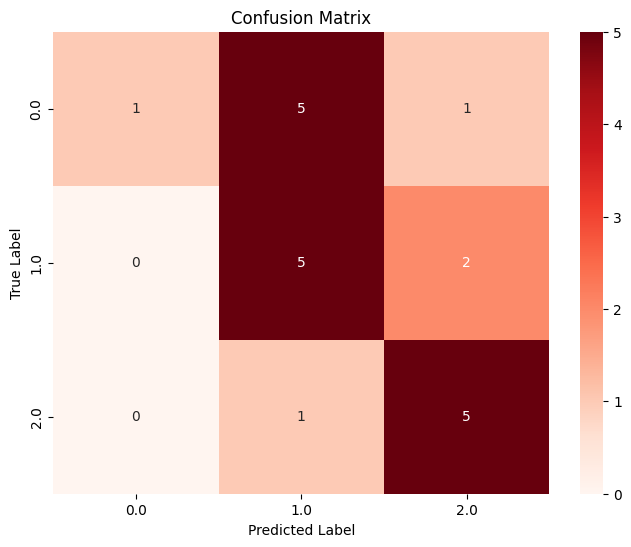

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi hasil menggunakan model yang sudah dilatih
y_pred = mlp.predict(X_test)  # Changed 'model' to 'mlp'

# Menghitung nilai akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix dengan warna ungu
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


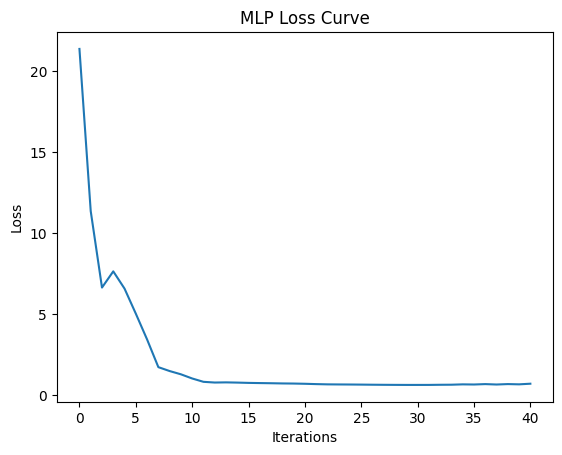

In [8]:
# prompt: plot mlp.loss_curve_

import matplotlib.pyplot as plt

plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("MLP Loss Curve")
plt.show()